# Algorithmes ensemblistes

Les méthodes ensemblistes représentent une catégorie de techniques avancées en apprentissage automatique, conçues pour améliorer les performances des modèles prédictifs en combinant les résultats de plusieurs modèles individuels. Plusieurs approches ont été développées dans le domaine des méthodes ensemblistes, dont les plus notables sont :

- Bagging
- Boosting
- Stacking

Il existe deux approches distinctes pour ces méthodes. D'une part, il y a les méthodes ensemblistes séquentielles, où les modèles sont appris successivement les uns après les autres. Cette approche présente l'avantage d'inciter chaque modèle suivant à accorder une attention accrue aux exemples précédemment mal étiquetés. Le Boosting fait partie de cette catégorie. D'autre part, il y a les méthodes ensemblistes parallèles où plusieurs modèles sont formés simultanément et indépendamment les uns des autres. Le Bagging et le stacking sont des exemples concrets de cette approche.


# Bagging

Donc comme dit avant, le bagging, ou "Bootstrap Aggregating", est une technique d'ensemble utilisée pour améliorer la performance des modèles prédictifs **en réduisant la variance** et en améliorant la stabilité. 
Son principe repose sur la création d'échantillons bootstrap, obtenus en tirant aléatoirement **avec remplacement** des exemples du jeu de données d'entraînement initial. Il est donc possible d'avoir la même observation plusieurs fois dans le même échantillon, et également d'un échantillon à l'autre, tandis que d'autres peuvent ne pas être sélectionnées. 
Sur chaque échantillon bootstrap, un modèle individuel est formé, puis les prédictions de ces modèles sont agrégées pour obtenir une prédiction finale. 

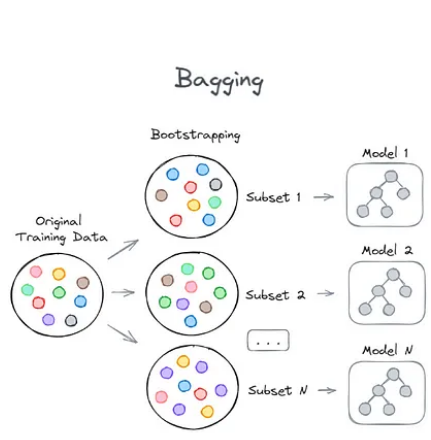

In [9]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/bagging.png"
width = 300
height = 300
Image(filename=image_path, width=width, height=height)

Plus précisemment, le bagging (bootstrap aggregating) est une technique où plusieurs modèles (plusieurs meme type de modèle) sont entraînés sur des sous-ensembles aléatoires d'échantillons d'entraînement avec remplacement. Les prédictions de chaque modèle sont ensuite agrégées pour obtenir une prédiction finale. Comme le Random forest qu'on expliquera dans la suite : Les forêts aléatoires combinent les prédictions de multiples arbres de décision. Chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement et utilise une sélection aléatoire de fonctionnalités à chaque division. L'agrégation des prédictions des arbres permet d'améliorer la précision et la stabilité des résultats.

Ensuite, chaque sous-ensemble de données est utilisé pour entraîner son propre arbre de décision. En conséquence, nous obtenons un ensemble de modèles différents. La moyenne de toutes les prédictions des différents arbres est utilisée, ce qui est plus robuste qu'un seul arbre de décision.
 
# Forêt aléatoire

Le forêt aléatoire est un algorithme d'apprentissage automatique qui combine l'idée des arbres de décision et de l'agrégation ensembliste pour créer un modèle robuste et performant. L'approche de la forêt aléatoire est une méthode de bagging où des arbres profonds indépendants, ajustés sur des échantillons bootstrap, sont combinés pour produire une sortie avec une variance réduite.

Chaque arbre possède une vision partielle sur le problème du fait d’un double tirage aléatoire. Le premier tirage aléatoire est donc
fait sur les observations. Puis, pour chaque échantillon tiré, on construit un arbre.

À chaque fois qu’un noeud doit être coupé, l'algorithme tire au hasard un échantillon de variables parmi lesquelles il choisit la meilleure de sorte que la variable réponse soit la plus homogène possible dans les deux noeuds fils. 

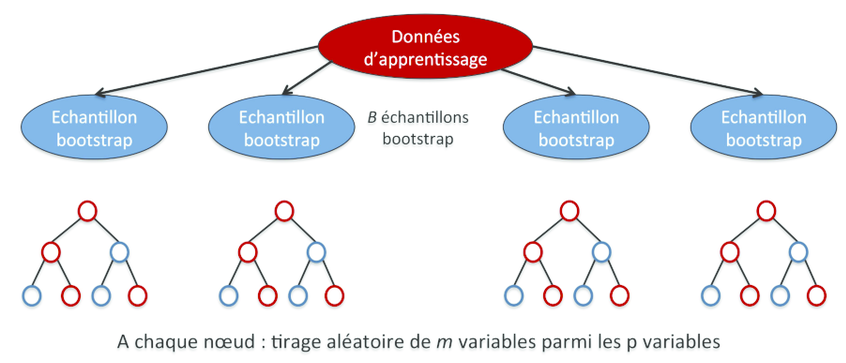

In [6]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/foret-aleatoire.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Ce tirage sur les variables permet de réduire la corrélation entre les arbres et d'éviter le surajustement en limitant la concentration excessive et unique sur les variables les plus importantes, et explorer une plus grande variété de caractéristiques potentiellement utiles.

Pour chacun des deux noeuds créés, l'algorithme répète la deuxième étape jusqu’à la fin de la classification. A la fin, tous ces arbres de décisions indépendants sont assemblés.

La prédiction faite par l'algorithme pour des données inconnues est celle qui a eu la majorité de vote. De plus, comme pour l'arbre de décision, il est également possible de prédire les probabilités associées à chaque classe.

La probabilité qu'une variable spécifique soit sélectionnée dans un arbre dépend de la taille du sous-échantillon de variables par rapport au nombre total de variables. Si le sous-échantillon de variables est relativement petit, il est possible que certaines variables ne soient pas sélectionnées dans un arbre donné.

# Avantages et Inconvénients du forêt aléatoire

| Avantages du forêt aléatoire                                 | Inconvénients du forêt aléatoire                               |
|------------------------------------------------------------|-----------------------------------------------------------------|
| Réduction du surajustement : L'utilisation de multiples arbres dans un Random Forest et l'agrégation des prédictions permettent de réduire le surajustement et d'améliorer la généralisation. | Perte d'interprétabilité : Lorsqu'un grand nombre d'arbres est utilisé, l'interprétation des résultats peut devenir plus complexe en raison de la combinaison des prédictions de multiples arbres. |
| Gestion des variables importantes : Les Random Forests peuvent estimer l'importance des variables en se basant sur l'augmentation de l'impureté lors du découpage, ce qui permet d'identifier les caractéristiques les plus prédictives. | Temps de calcul : La construction d'un grand nombre d'arbres dans un Random Forest peut nécessiter plus de temps de calcul que la construction d'un seul arbre de décision. |
| Parallélisme : Les calculs pour chaque arbre de décision peuvent être effectués en parallèle, ce qui accélère le processus d'entraînement sur des systèmes multi-cœurs. | |

Malgré la perte d'interprétabilité des résultats, le forêt aléatoire offre donc la possibilité de réduire le surapprentissage. De plus, les calculs pour chaque arbre de décision peuvent être effectués en parallèle, ce qui accélère le processus d'entraînement sur des systèmes multi-cœurs.

# Hyperparamètre du forêt aléatoire

Bien que la majorité des hyperparamètres du forêt aléatoire sont les mêmes que l'arbre de décision, on cite quelques hyperparamètres qui sont nécessaires à être bien définis et optimisés pour le forêt aléatoire:


| Hyperparamètre      | Description                                                                                                  |
|---------------------|--------------------------------------------------------------------------------------------------------------|
| n\_estimators       | Nombre d'arbres de décision dans la forêt. Augmenter ce nombre peut améliorer la précision du modèle, mais un excès peut causer du surajustement. |
| max\_samples        | Proportion d'échantillons d'entraînement utilisés pour chaque arbre de décision dans la forêt.             |
| max\_features       | Nombre de variables échantillonnées pour choisir la meilleure division. Une valeur plus élevée peut améliorer les performances, mais peut aussi rendre les arbres moins diversifiés et causer du surajustement. |
| bootstrap           | Paramètre pour activer ou désactiver le bootstrap. Si désactivé, l'échantillon complet est utilisé pour chaque arbre. |
| n\_jobs             | Nombre de processeurs utilisés pour l'entraînement en parallèle, accélérant l'entraînement sur des systèmes multi-cœurs. |



# Extra trees

L'Extra Trees (ou Extreme Randomized Trees) est une variation du forêt aléatoire qui se distingue par deux principales différences par rapport à la construction des arbres de décision:

- Dans Extra Trees, les seuils de division pour chaque variable sont choisis de manière aléatoire, plutôt que d'être déterminés par l'indice de Gini ou l'entropie. Cela permet de construire rapidement les arbres sans nécessiter de recherche du meilleur seuil de division, ce qui a pour avantage de réduire significativement le temps de calcul, et améliorer la capacité du modèle à généraliser à de nouvelles données.%, car les arbres sont moins susceptibles de s'adapter de manière excessive aux données d'entraînement. 
Cependant, il est important de noter que cette rapidité peut être accompagnée d'une légère perte de précision par rapport aux arbres construits avec des critères d'optimisation. De plus, étant donné que les seuils de découpage sont choisis de manière aléatoire, l'algorithme est moins susceptible d'être influencé par des valeurs atypiques ou des erreurs de mesure. Ce qui conduit  à un modèle plus stable et moins sensible aux données aberrantes.

- Dans Extra trees, les arbres de décisions partent de la totalité des données.


# Comparaison des algorithmes

| Arbre de décision | Forêt aléatoire | Forêts Extrêmement Aléatoires |
|-------------------|-----------------|-------------------------------|
| Un seul arbre est construit | Plusieurs arbres sont construits | Plusieurs arbres sont construits |
| On part de la totalité des données à la racine | On échantillonne par bootstrap | On part de la totalité des données à la racine |
| Teste toutes les variables à chaque division | Échantillonnage aléatoire des variables | Échantillonnage aléatoire des variables |
| Cherche le meilleur seuil pour diviser les données continues | Cherche le meilleur seuil pour diviser les données continues | Divise les données suivant un seuil aléatoire |

# aléatoire avec Scikit-Learn

In [15]:
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = sns.load_dataset('titanic')
df = pd.DataFrame(df)
df = df[["pclass", "sex", "age", "fare", "class" ,"survived"]]
df

,pclass,sex,age,fare,class,survived
0,3,male,22.0,7.2500,Third,0
1,1,female,38.0,71.2833,First,1
2,3,female,26.0,7.9250,Third,1
3,1,female,35.0,53.1000,First,1
4,3,male,35.0,8.0500,Third,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,Second,0
887,1,female,19.0,30.0000,First,1
888,3,female,NaN,23.4500,Third,0
889,1,male,26.0,30.0000,First,1


**Imputation des valeurs manquantes**

In [17]:
df['age'] = df['age'].fillna(df['age'].median())

**Encodage des variables catégorielles**

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

#sex
lb = LabelBinarizer()
df["sex"] = lb.fit_transform(df["sex"])

#class
ordinal_encoder = OrdinalEncoder()
df[["class"]] = ordinal_encoder.fit_transform(df[["class"]])

In [19]:
X = df.drop('survived', axis=1)
y = df[["survived"]]

**Division des données en 30% données de test et 70% données d'entraînement**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Optimisation des hyperparamètres du modèle**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(max_depth=10)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [5, 10, 15, 20, 50],
    'min_samples_leaf': [5, 10, 15, 20, 50],
    'max_leaf_nodes': [10, 20, 30, 40, 50, 80],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 1.0],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    'n_estimators': [5, 10, 30, 50],
    'max_samples': [0.5, 0.7, 0.9],  
    'max_features': ['auto', 'sqrt', 'log2'] 
}




search = RandomizedSearchCV(model, param_grid, scoring='f1', cv=5, n_iter=400)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=400,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.01, 0.1,
                                                      1.0],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           80],
                                        'max_samples': [0.5, 0.7, 0.9],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1, 1.0],
                                        'min_samples_leaf': [5, 10, 15, 20, 50],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              50],
                                        'n_estimators': [5, 10, 30, 50]},
                   scoring='f1')

In [22]:
search.best_params_

{'n_estimators': 50,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0,
 'max_samples': 0.9,
 'max_leaf_nodes': 20,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy',
 'ccp_alpha': 0.001}

In [23]:
search.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_leaf_nodes=20, max_samples=0.9, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=50)

**Entrainement du modèle**

In [27]:
model = RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_leaf_nodes=20, max_samples=0.9, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=50)

model = model.fit(X_train,y_train)

#predicting on the test data
y_pred = model.predict(X_test)

**Evaluation du modèle**

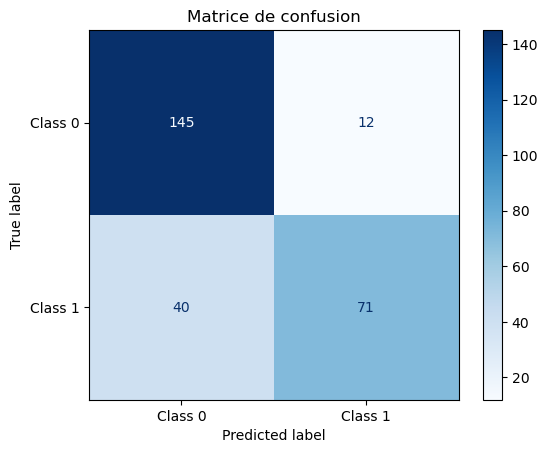

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matrice de confusion')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8059701492537313
Precision: 0.8554216867469879
Recall: 0.6396396396396397
F1 Score: 0.731958762886598


# importance des variables

Pour déterminer quelles variables sont les plus importantes dans le modèle de forêt aléatoire, nous nous appuyons sur la méthode de l'importance des caractéristiques basée sur l'entropy.

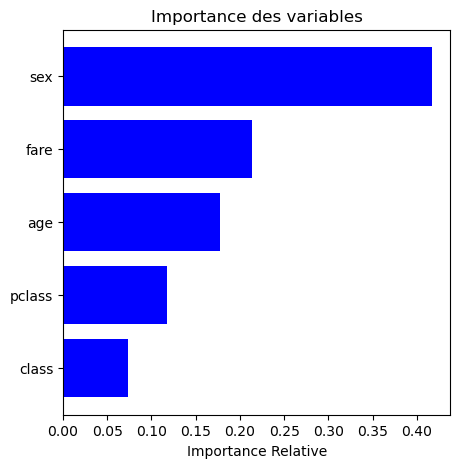

In [35]:
import numpy as np
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5, 5))
plt.title('Importance des variables')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Relative')
plt.show()

Plus la réduction de l'impureté est élevée, plus la variable est importante.